In [5]:
# load data
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

data_tr = datasets.MNIST(root="./datasets/MNIST", train=True, download=True, transform=ToTensor())

data_ts = datasets.MNIST(root="./datasets/MNIST", train=False, download=True, transform=ToTensor())


In [6]:
from torch.utils.data import DataLoader

loaded_train = DataLoader(data_tr, batch_size=64, shuffle=True)
loaded_test = DataLoader(data_ts, batch_size=64, shuffle=True)

In [7]:
import numpy as np


In [8]:
Xtr = np.array(data_tr.data)
ytr = np.array(data_tr.targets)

Xts = np.array(data_ts.data)
yts = np.array(data_ts.targets)

In [36]:
Xtr_rows = Xtr.reshape(60000, 28*28)
Xtr_rows = Xtr_rows[:50000,]
Xtr_rows_vali = Xtr_rows[-10000:,]
print(Xtr_rows.shape)

Xts_rows = Xts.reshape(10000, 28*28)


(50000, 784)


In [37]:
ytr=ytr[:50000]
ytr_vali = ytr[-10000:]

In [47]:
from sklearn.neighbors import KNeighborsClassifier

soused = KNeighborsClassifier(n_neighbors=3)
soused.fit(Xtr_rows, ytr)

KNeighborsClassifier(n_neighbors=3)

In [41]:
soused.score(Xts_rows, yts)

0.9681

In [44]:
listOfk = [1, 2, 3, 5, 7, 10, 30, 100]
scoreVali = []
scoreTest = []

import matplotlib.pyplot as plt

for k in listOfk:
    print("Now calculating for:", k)
    soused = KNeighborsClassifier(n_neighbors=k)
    soused.fit(Xtr_rows, ytr)
    scoreVali.append(soused.score(Xtr_rows_vali, ytr_vali))
    scoreTest.append(soused.score(Xts_rows, yts))



Now calculating for: 1
Now calculating for: 2
Now calculating for: 3
Now calculating for: 5
Now calculating for: 7
Now calculating for: 10
Now calculating for: 30
Now calculating for: 100


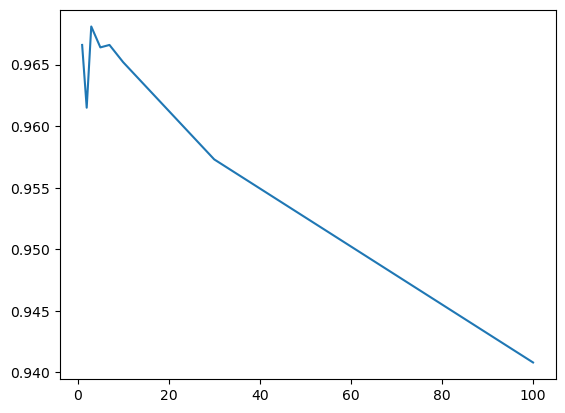

In [46]:
plt.plot(listOfk, scoreTest)

In [86]:
test1 = Xts_rows[999]
outcome1 = yts[999]

test1

soused.predict(test1.reshape(1, -1))[0]

9

In [87]:
outcome1

9

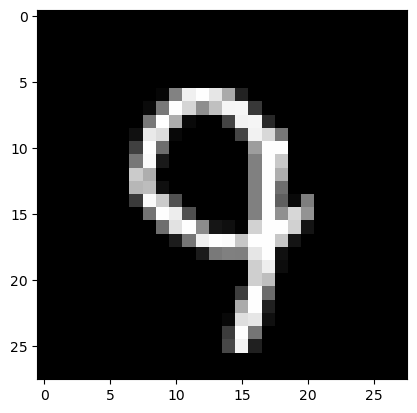

In [88]:
plt.imshow(test1.reshape(28, 28), cmap = "gray")

In [69]:
i=0
j=0
badOnes = []
outcomeList = []

while i < 10:
    test = Xts_rows[j]
    y = yts[j]
    outcome = soused.predict(test.reshape(1, -1))



    if y != outcome[0]:
        i += 1
        badOnes.append(j)
        outcomeList.append(outcome[0])
        print("find one: ", j)

    j += 1


find one:  115
find one:  195
find one:  241
find one:  247
find one:  268
find one:  300
find one:  318
find one:  320
find one:  321
find one:  326


In [76]:
soused.score(Xts_rows, yts)

0.9681

Outcome: 4  Pred:  9


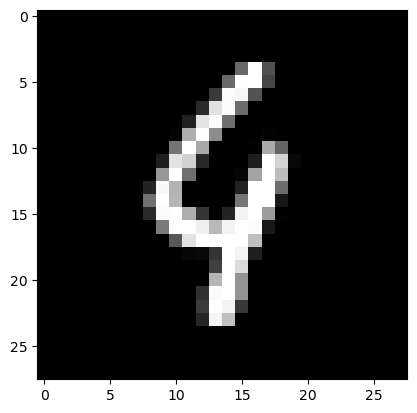

Outcome: 3  Pred:  1


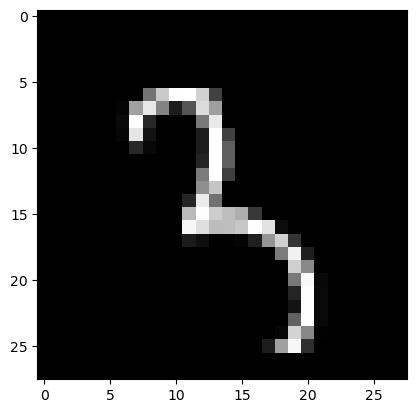

Outcome: 9  Pred:  8


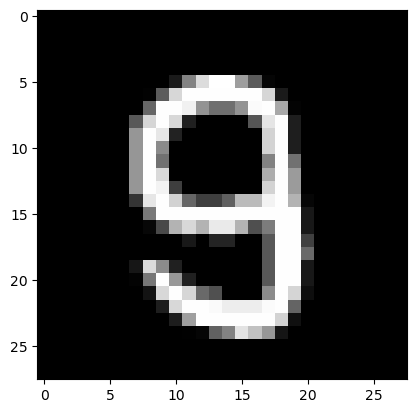

Outcome: 4  Pred:  6


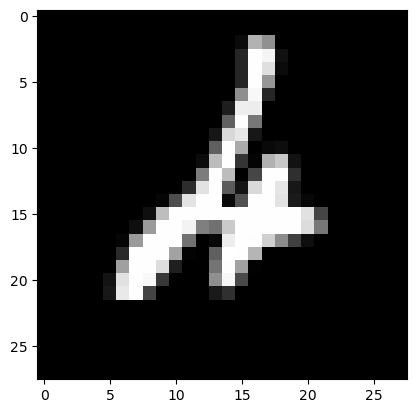

Outcome: 8  Pred:  3


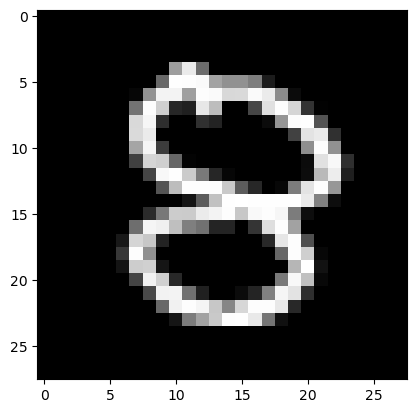

Outcome: 4  Pred:  1


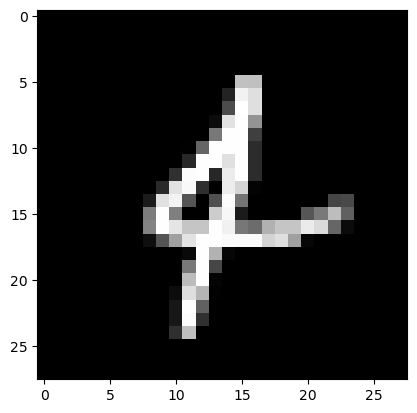

Outcome: 2  Pred:  0


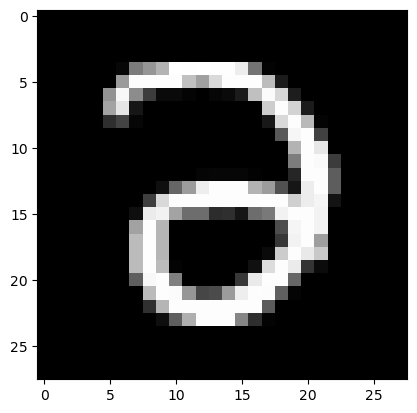

Outcome: 9  Pred:  7


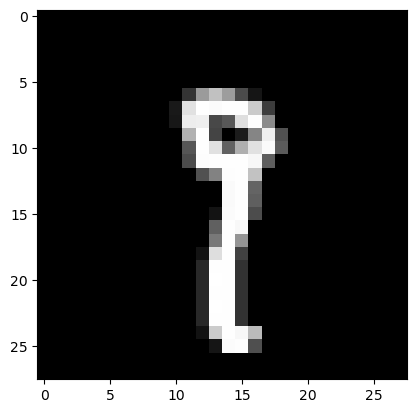

Outcome: 2  Pred:  7


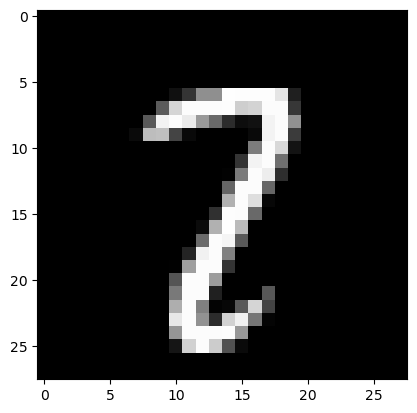

Outcome: 2  Pred:  1


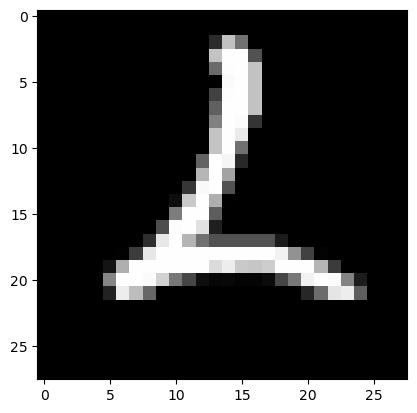

In [75]:


for index in range(0,len(badOnes)):
    print("Outcome:", yts[badOnes[index]], " Pred: ", outcomeList[index])
    plt.imshow(Xts[badOnes[index]], cmap="gray")
    plt.show()

In [79]:
for index in range(0,5):
    temp = soused.predict(Xts_rows[index].reshape(-1, 1))
    print("Outcome:", yts[index], " Pred: ", temp[0])
    plt.imshow(Xts[index], cmap="gray")
    plt.show()

ValueError: X has 1 features, but KNeighborsClassifier is expecting 784 features as input.